<a href="https://colab.research.google.com/github/KP-Akshay04/Reggression/blob/master/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving weather.csv to weather (1).csv


In [ ]:
import numpy as numpyInstance
import pandas as pandasInstance
import matplotlib.pyplot as matplotlibInstance
import seaborn as seabornInstance

In [ ]:
weatherData = pandasInstance.read_csv('weather.csv')
weatherData.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

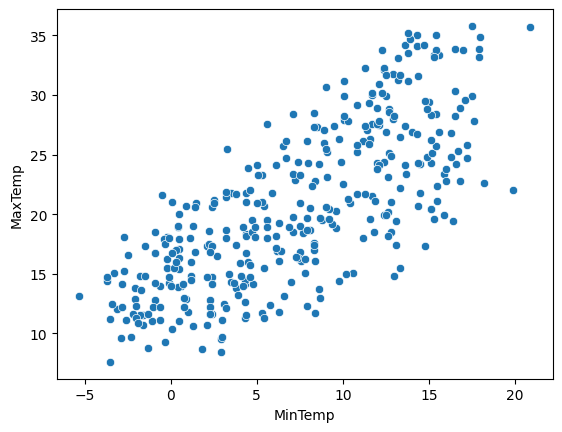

In [ ]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=weatherData)

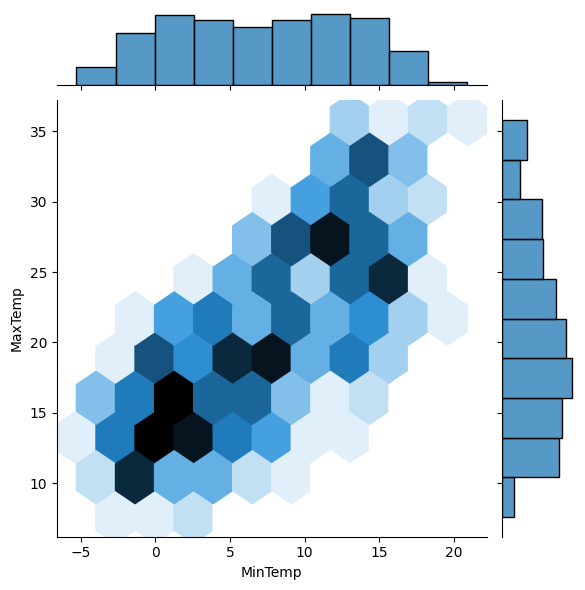

In [ ]:
sns.jointplot(x='MinTemp',y='MaxTemp',data=weatherData,kind='hex')

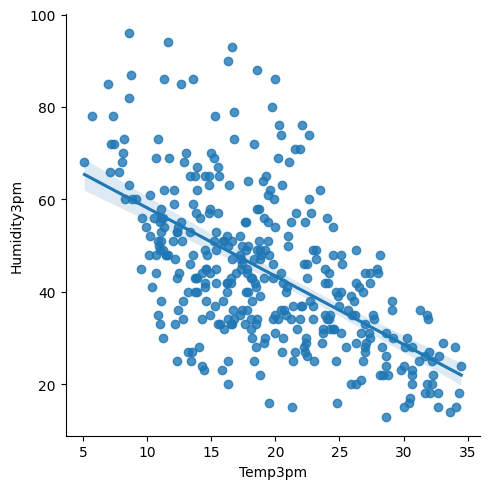

In [ ]:
sns.lmplot(x='Temp3pm', y='Humidity3pm', data=weatherData)

/tmp/ipython-input-2278180270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weatherData['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

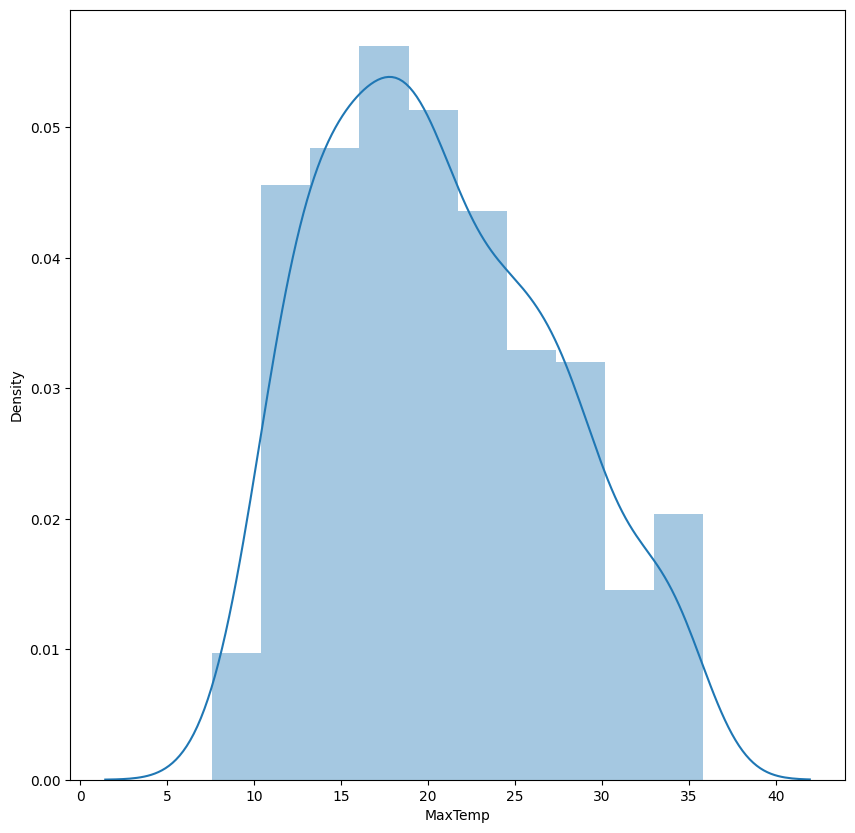

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(weatherData['MaxTemp'])

In [ ]:
Y_prediction=weatherData[['Temp3pm']]
Y_prediction

,Temp3pm
0,23.6
1,25.7
2,20.2
3,14.1
4,15.4
...,...
361,30.0
362,28.2
363,18.3
364,25.9


In [ ]:
y_Prediction = weatherData[['MinTemp']]
print(y_Prediction)

     MinTemp
0        8.0
1       14.0
2       13.7
3       13.3
4        7.6
..       ...
361      9.0
362      7.1
363     12.5
364     12.5
365     12.3

[366 rows x 1 columns]


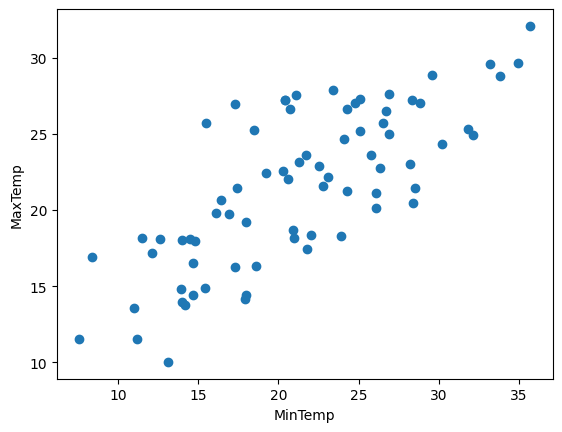

In [ ]:
matplotlibInstance.scatter(y_test,temperaturePrediction)
matplotlibInstance.xlabel('MinTemp')
matplotlibInstance.ylabel('MaxTemp')
matplotlibInstance.show()

/tmp/ipython-input-2757590232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-temperaturePrediction)


<Axes: xlabel='MaxTemp', ylabel='Density'>

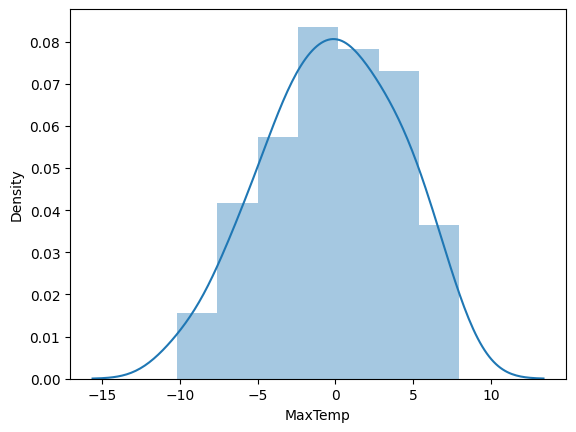

In [ ]:
sns.distplot(y_test-temperaturePrediction)

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,temperaturePrediction)

3.4814063708584673

In [ ]:
metrics.mean_squared_error(y_test,temperaturePrediction)

18.01570415674295

In [ ]:
numpyInstance.sqrt(metrics.mean_squared_error(y_test,temperaturePrediction))

np.float64(4.244491036242502)

In [ ]:
model.coef_

array([0.84153217])